In [2]:
import sys
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ddm_directory = os.path.abspath('../DDM/DDM_raw')
ddm_reel = pd.read_csv(os.path.join(ddm_directory, "estimates_all_raw_anova.csv"), header=0, sep =';')
data_long_ddm_reel = pd.melt(ddm_reel, id_vars=['dataset'], 
                    value_vars=['a_iid_diff', 'v_iid_diff', 't0_iid_diff', 'st0_iid_diff',
       'a_iid_same', 'v_iid_same', 't0_iid_same', 'st0_iid_same', 'a_rdw_diff',
       'v_rdw_diff', 't0_rdw_diff', 'st0_rdw_diff', 'a_rdw_same', 'v_rdw_same',
       't0_rdw_same', 'st0_rdw_same'],
                    var_name='Condition', value_name='Response')

# Extract additional information for plotting
data_long_ddm_reel['Path Type'] = data_long_ddm_reel ['Condition'].apply(lambda x: 'IID' if 'iid' in x else 'RDW')
data_long_ddm_reel['Condition Type'] = data_long_ddm_reel ['Condition'].apply(lambda x: 'Same' if 'same' in x else 'Opposite')
data_long_ddm_reel['Response Type'] = data_long_ddm_reel['Condition'].apply(
    lambda x: 'a' if 'a_' in x else ('st0' if 'st0_' in x else ('ter' if 't0_' in x else 'v'))
)
data_long_ddm_reel =data_long_ddm_reel.sort_values(['Condition Type','Path Type'], ascending=[False,False],ignore_index=True)

In [6]:
ddm_directory = os.path.abspath('../DDM/DDM_on_LSTM')
ddm_sim = pd.read_csv(os.path.join(ddm_directory, "DDM_sim_ANOVA_v1.csv"), header=0, sep =';')
ddm_sim = ddm_sim.iloc[:28]
data_long_ddm_sim = pd.melt(ddm_sim, id_vars=['dataset'], 
                    value_vars=['a_iid_diff', 'v_iid_diff', 't0_iid_diff', 'st0_iid_diff',
       'a_iid_same', 'v_iid_same', 't0_iid_same', 'st0_iid_same', 'a_rdw_diff',
       'v_rdw_diff', 't0_rdw_diff', 'st0_rdw_diff', 'a_rdw_same', 'v_rdw_same',
       't0_rdw_same', 'st0_rdw_same'],
                    var_name='Condition', value_name='Response')

# Extract additional information for plotting
data_long_ddm_sim['Path Type'] = data_long_ddm_sim ['Condition'].apply(lambda x: 'IID' if 'iid' in x else 'RDW')
data_long_ddm_sim['Condition Type'] = data_long_ddm_sim ['Condition'].apply(lambda x: 'Same' if 'same' in x else 'Opposite')
data_long_ddm_sim['Response Type'] = data_long_ddm_sim['Condition'].apply(
    lambda x: 'a' if 'a_' in x else ('st0' if 'st0_' in x else ('ter' if 't0_' in x else 'v'))
)
data_long_ddm_sim =data_long_ddm_sim.sort_values(['Condition Type','Path Type'], ascending=[False,False],ignore_index=True)


In [34]:
def plotting_1(data_long_ddm, ):
    fontsize=42
    plt.figure(figsize=(30,25))
    plt.subplots_adjust(wspace=0.3,)

# Subplot 1
    plt.subplot(2, 2, 1)
    ax = sns.pointplot(data=data_long_ddm[data_long_ddm['Response Type']=='a'], 
                   x='Condition Type', y='Response', hue='Path Type', 
                   markers=['s', 's'], linestyles=["-", "-"], color=".5", 
                   errorbar="se")
    plt.setp(ax.lines, linewidth=5)  # Adjust line width
    plt.setp(ax.collections, sizes=[400])  # Adjust marker size
    plt.xlabel('Side condition', fontsize=fontsize)
    plt.ylabel('a', fontsize=fontsize)
    plt.legend(fontsize=38, loc='upper right', frameon=False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.ylim(0.6, 2)
    plt.text(-1, 2, 'A', fontsize=fontsize)
    #plt.text(-0.08, 1.07, '*', fontsize=fontsize, weight='bold')
    #plt.text(0.5, 1.12, '*', fontsize=fontsize, weight='bold')
    plt.tick_params(axis='both', which='major', labelsize=fontsize)
    plt.tick_params(axis='both', which='major', labelsize=fontsize, length=15, width=2) 
# Subplot 2
    plt.subplot(2, 2, 2)
    ax = sns.pointplot(data=data_long_ddm[data_long_ddm['Response Type']=='v'], 
                   x='Condition Type', y='Response', hue='Path Type', 
                   markers=['s', 's'], linestyles=["-", "-"], color=".5", 
                   errorbar="se")
    plt.setp(ax.lines, linewidth=5)  # Adjust line width
    plt.setp(ax.collections, sizes=[400])  # Adjust marker size
    plt.xlabel('Side condition', fontsize=fontsize)
    plt.ylabel('v', fontsize=fontsize)
    plt.legend(fontsize=38, loc='upper right', frameon=False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.text(-1, 3.5, 'B', fontsize=fontsize)
    #plt.text(0.5, 0.6, '*', fontsize=fontsize, weight='bold')
    #plt.text(0.5, 2.5, '*', fontsize=fontsize, weight='bold')
    plt.ylim(0, 3.5)
    plt.tick_params(axis='both', which='major', labelsize=fontsize)
    plt.tick_params(axis='both', which='major', labelsize=fontsize, length=15, width=2) 
# Subplot 3
    plt.subplot(2, 2, 3)
    ax = sns.pointplot(data=data_long_ddm[data_long_ddm['Response Type']=='ter'], 
                   x='Condition Type', y='Response', hue='Path Type', 
                   markers=['s', 's'], linestyles=["-", "-"], color=".5", 
                   errorbar="se")
    plt.setp(ax.lines, linewidth=5)  # Adjust line width
    plt.setp(ax.collections, sizes=[400])  # Adjust marker size
    plt.xlabel('Side condition', fontsize=fontsize)
    #plt.ylabel('Ter (s)', fontsize=fontsize)
    plt.ylabel(r'$T_{\mathrm{er}}$ (s)', fontsize=fontsize)
    plt.legend(fontsize=38, loc='upper right', frameon=False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.text(-1, 0.5, 'C', fontsize=fontsize)
    plt.text(-0.1, 0.2, '*', fontsize=fontsize, weight='bold')
    plt.text(0.4, 0.19, '*', fontsize=fontsize, weight='bold')
    plt.ylim(0, 0.5)
    plt.tick_params(axis='both', which='major', labelsize=fontsize)
    plt.tick_params(axis='both', which='major', labelsize=fontsize, length=15, width=2) 
# Subplot 4
    plt.subplot(2, 2, 4)
    ax = sns.pointplot(data=data_long_ddm[data_long_ddm['Response Type']=='st0'], 
                   x='Condition Type', y='Response', hue='Path Type', 
                   markers=['s', 's'], linestyles=["-", "-"], color=".5", 
                   errorbar="se")
    plt.setp(ax.lines, linewidth=5)  # Adjust line width
    #plt.setp(ax.collections, sizes=[400])  # Adjust marker size
    plt.xlabel('Side condition', fontsize=fontsize)
    plt.ylabel(r'$s_{\mathrm{Ter}}$ (s)', fontsize=fontsize)
    plt.legend(fontsize=38, loc='upper right', frameon=False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.text(-1, 0.5, 'D', fontsize=fontsize)
    plt.ylim(0, 0.5)
    plt.tick_params(axis='both', which='major', labelsize=fontsize)
    plt.tick_params(axis='both', which='major', labelsize=fontsize, length=15, width=2) 
    plt.subplots_adjust(wspace=0.3, hspace=0.4)
# Save the figure
#plt.savefig('ddm_4param.png', dpi=300)


In [8]:


def plotting_comparison(data_real, data_sim):
    fontsize = 42
    fig, axes = plt.subplots(4, 2, figsize=(35, 40))  
    plt.subplots_adjust(wspace=0.3, hspace=0.4)
    
    response_types = ['a', 'v', 'ter', 'st0']
    y_labels = ['a', 'v', r'$T_{\mathrm{er}}$ (s)', r'$s_{\mathrm{Ter}}$ (s)']
    titles = ['Real Data', 'Simulated Data']
    y_lims = [(0.6, 2), (0, 3.5), (0, 0.4), (0, 0.4)]
    letters = ['A', 'B', 'C', 'D']
    
    for i, (resp_type, y_label, ylim, letter) in enumerate(zip(response_types, y_labels, y_lims, letters)):
        for j, data in enumerate([data_real, data_sim]):
            ax = axes[i, j]
            sns.pointplot(
                data=data[data['Response Type'] == resp_type],
                x='Condition Type', y='Response', hue='Path Type',
                markers=['s', 's'], linestyles=["-", "-"], color=".5", 
                errorbar="se", ax=ax
            )
            ax.set_xlabel('Side condition', fontsize=fontsize)
            ax.set_ylabel(y_label, fontsize=fontsize)
            
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_ylim(*ylim)
            ax.text(-1, ylim[1], letter if j == 0 else '', fontsize=fontsize)
            if i == 0:  
                ax.set_title(titles[j], fontsize=fontsize, pad=20)
            ax.tick_params(axis='both', which='major', labelsize=fontsize, length=15, width=2)  
            plt.setp(ax.lines, linewidth=5) 
            plt.setp(ax.collections, sizes=[400])
            ax.legend(fontsize=38, loc='upper right', frameon=False)

            if resp_type == 'ter':
                if j == 0:  # REAL
                    ax.text(-0.10, 0.19, '*', fontsize=fontsize, weight='bold')  # iid same vs rdw same
                    ax.text(0.29, 0.17, '*', fontsize=fontsize, weight='bold')  # rdw same vs rdw opposite
                elif j == 1: 
                    ax.text(0.35, 0.3, '*', fontsize=fontsize, weight='bold')  # iid vs rdw

            if resp_type == 'a':
                if j == 0:  # REAL
                    ax.text(-0.07, 1.04, '*', fontsize=fontsize, weight='bold')  # iid same vs rdw same
                    ax.text(0.4, 1.13, '*', fontsize=fontsize, weight='bold')  # rdw same vs rdw opposite
                elif j == 1: 
                    ax.text(0.4, 1.00, '*', fontsize=fontsize, weight='bold')  # iid vs rdw
                    ax.text(-0.07, 0.95, '*', fontsize=fontsize, weight='bold')  # iid same vs rdw same

            if resp_type == 'v':
                if j == 0:  # REAL
                    ax.text(0.4, 0.5, '*', fontsize=fontsize, weight='bold')  # iid same vs rdw same
                    ax.text(0.4, 2.5, '*', fontsize=fontsize, weight='bold')  # rdw same vs rdw opposite
                elif j == 1: 
                    ax.text(0.4, 0.77, '*', fontsize=fontsize, weight='bold')  # iid vs rdw
                    ax.text(0.4,  2.5, '*', fontsize=fontsize, weight='bold')  # iid same vs rdw same
    plt.show()
    




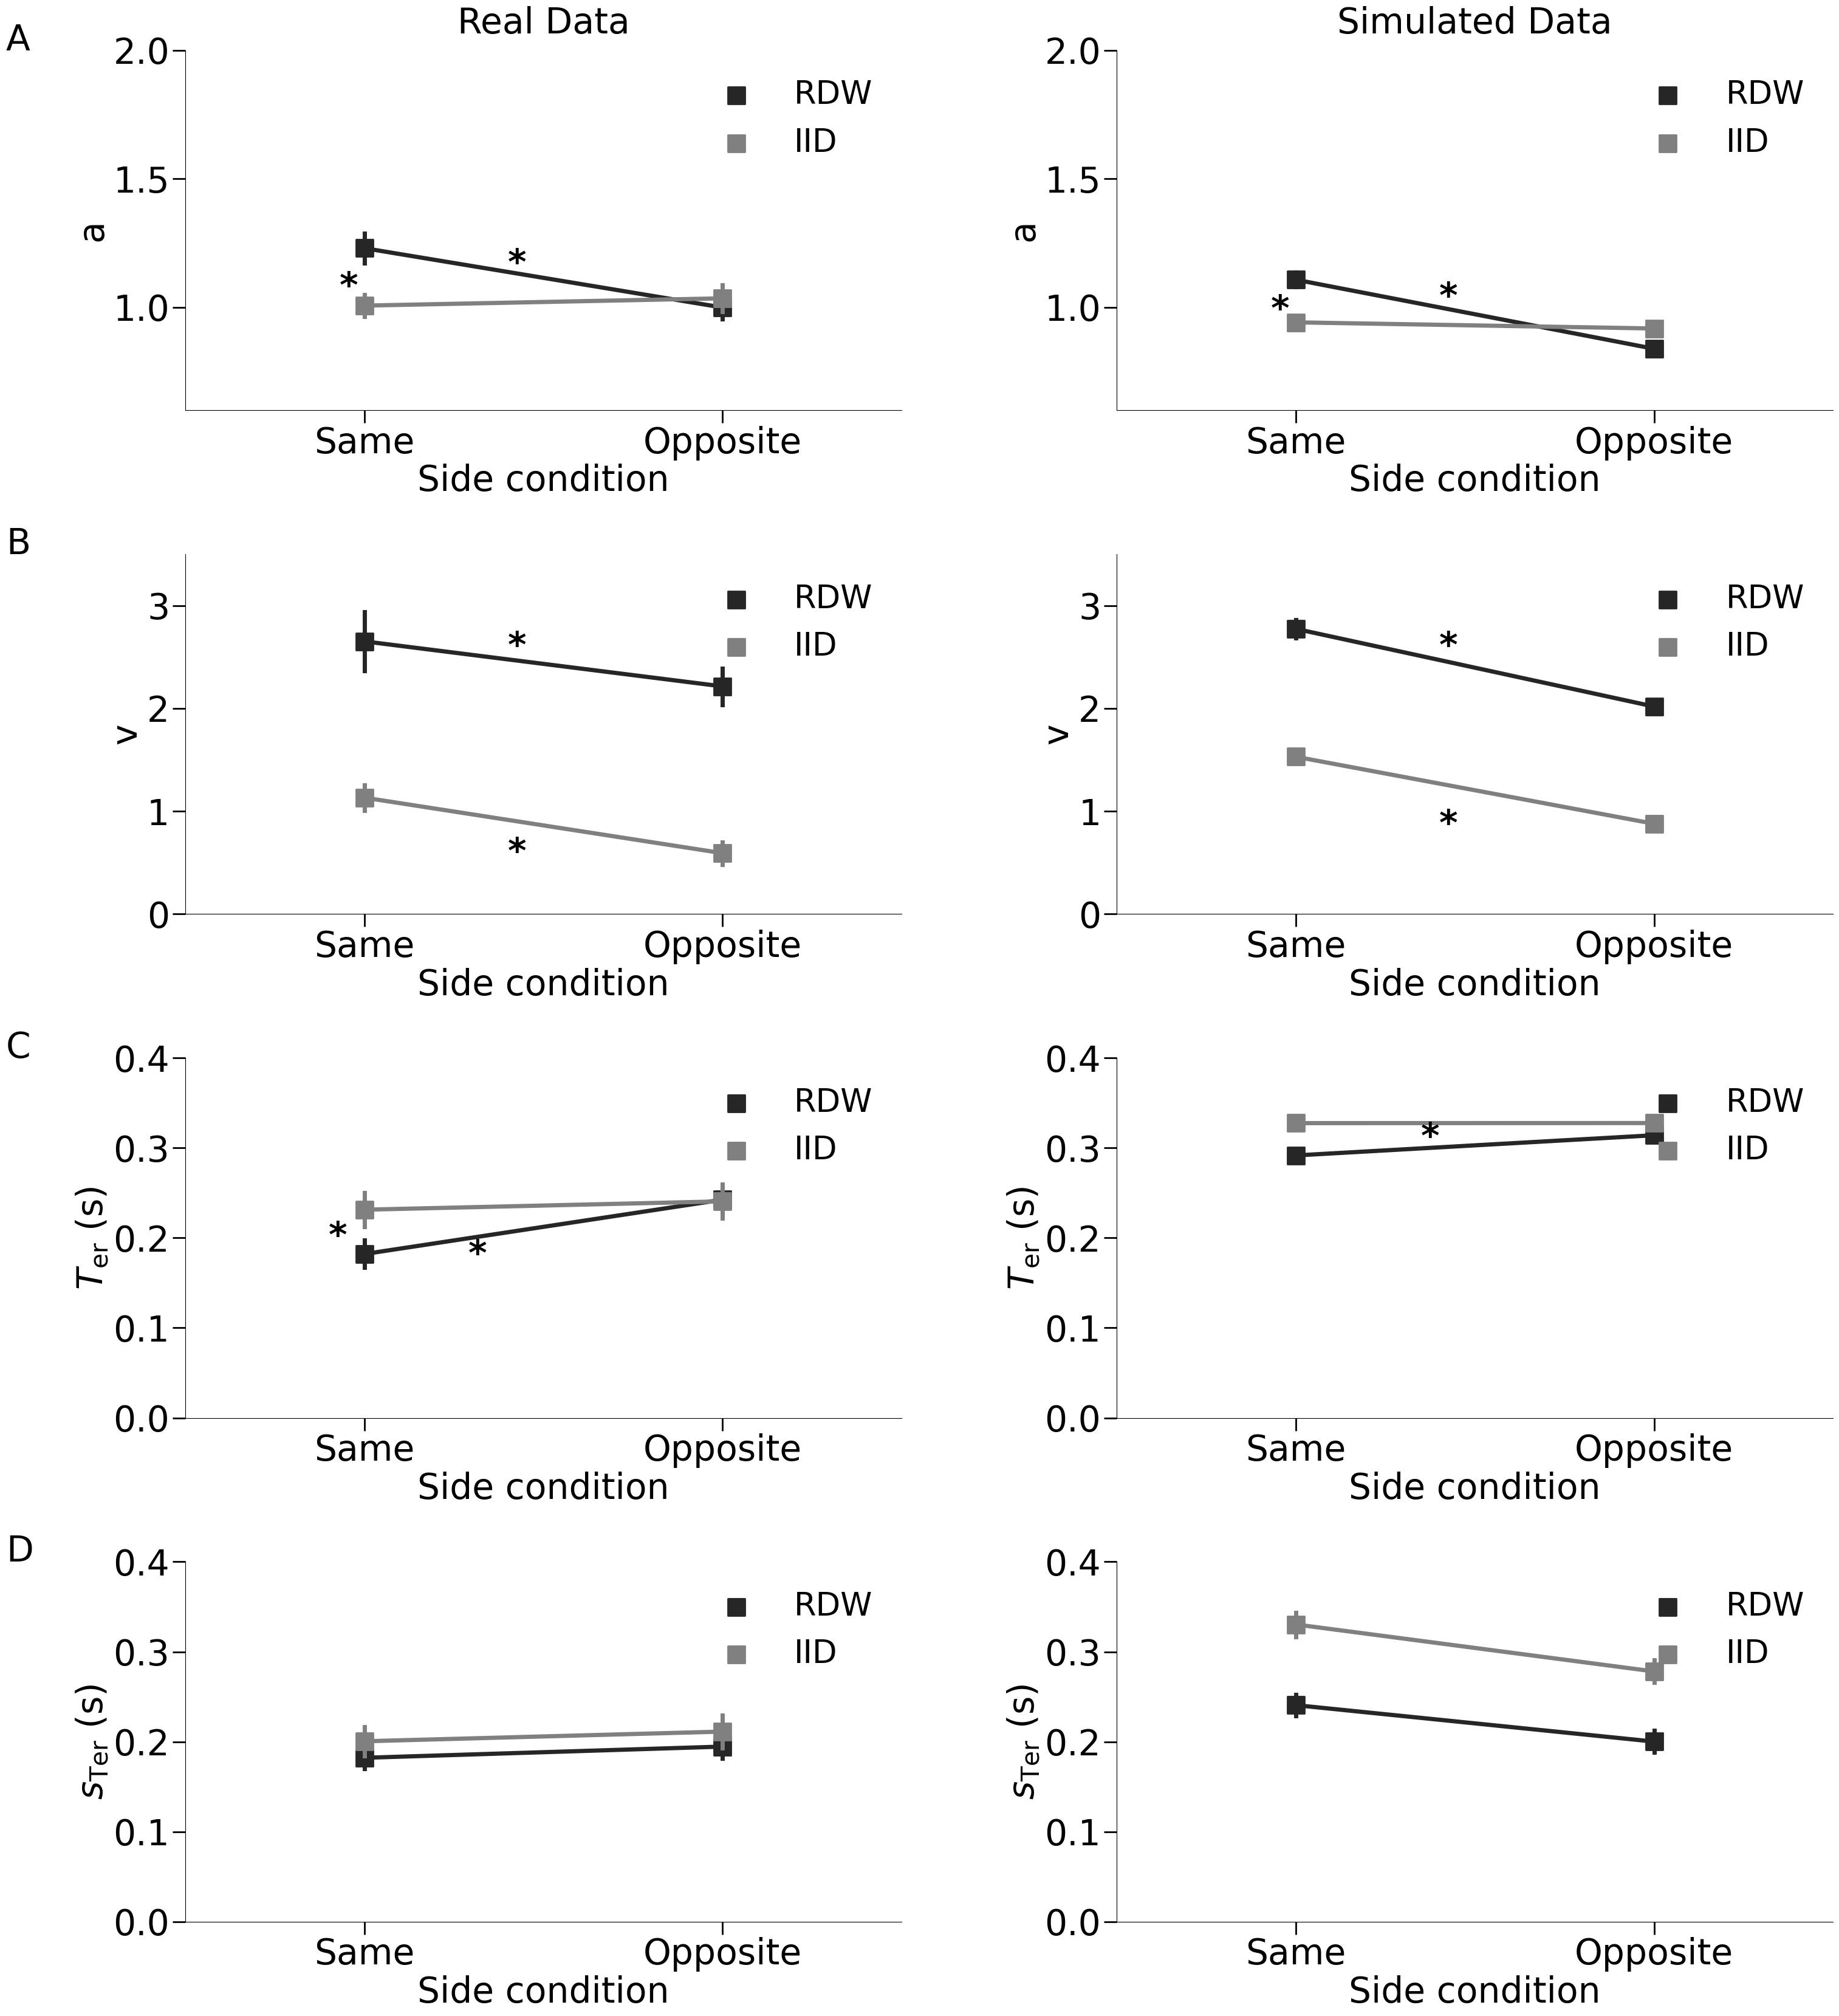

In [9]:
plotting_comparison(data_long_ddm_reel, data_long_ddm_sim)